In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/depression-nitish/download_images/image_2075_1.jpg
/kaggle/input/depression-nitish/download_images/image_365_1.jpg
/kaggle/input/depression-nitish/download_images/image_257_0.jpg
/kaggle/input/depression-nitish/download_images/image_1335_0.jpg
/kaggle/input/depression-nitish/download_images/image_1265_1.jpg
/kaggle/input/depression-nitish/download_images/image_1343_0.jpg
/kaggle/input/depression-nitish/download_images/image_1148_1.jpg
/kaggle/input/depression-nitish/download_images/image_1212_1.jpg
/kaggle/input/depression-nitish/download_images/image_663_1.jpg
/kaggle/input/depression-nitish/download_images/image_869_0.jpg
/kaggle/input/depression-nitish/download_images/image_2017_1.jpg
/kaggle/input/depression-nitish/download_images/image_368_0.jpg
/kaggle/input/depression-nitish/download_images/image_1584_0.jpg
/kaggle/input/depression-nitish/download_images/image_42_1.jpg
/kaggle/input/depression-nitish/download_images/image_1348_0.jpg
/kaggle/input/depression-nitish/

In [2]:
import cv2
import numpy as np
import os

# Define the path to the image directory
image_dir = '/kaggle/input/depression-nitish/download_images'

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Failed to read image at {image_path}")
        return None
    
    label = image_path.split(".jpg")[0][-1]

    # Convert image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extract hue and saturation channels
    hue_channel = hsv_image[:, :, 0].flatten()
    saturation_channel = hsv_image[:, :, 1].flatten()

    # Calculate statistical features
    mean_hue = np.mean(hue_channel)
    mean_saturation = np.mean(saturation_channel)
    std_dev_hue = np.std(hue_channel)
    std_dev_saturation = np.std(saturation_channel)

    return mean_hue, mean_saturation, std_dev_hue, std_dev_saturation, int(label)

# Initialize lists to store features
mean_hue_values = []
mean_saturation_values = []
std_dev_hue_values = []
std_dev_saturation_values = []
labels = []

# Iterate over images in the directory and extract features
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)
    features = extract_features(image_path)
    if features is not None:
        mean_hue_values.append(features[0])
        mean_saturation_values.append(features[1])
        std_dev_hue_values.append(features[2])
        std_dev_saturation_values.append(features[3])
        labels.append(features[4])

# Convert lists to numpy arrays
mean_hue_values = np.array(mean_hue_values)
mean_saturation_values = np.array(mean_saturation_values)
std_dev_hue_values = np.array(std_dev_hue_values)
std_dev_saturation_values = np.array(std_dev_saturation_values)

# Display extracted features
print("Mean Hue Values:", mean_hue_values)
print("Mean Saturation Values:", mean_saturation_values)
print("Standard Deviation of Hue Values:", std_dev_hue_values)
print("Standard Deviation of Saturation Values:", std_dev_saturation_values)
print("Label Values:", labels)


Mean Hue Values: [34.88363636 61.44240741 33.26473251 ...  0.          0.
 31.35415638]
Mean Saturation Values: [ 64.73727273  85.85645062 119.52596708 ...   0.           0.
 113.13403292]
Standard Deviation of Hue Values: [41.76470037 46.0148059  46.72914864 ...  0.          0.
 29.94695182]
Standard Deviation of Saturation Values: [72.04360327 70.36145465 67.47911203 ...  0.          0.
 44.6553286 ]
Label Values: [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-06-19 13:00:29.435582: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:00:29.435735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:00:29.583851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Assuming you have extracted features and labels from the images
# Combine the extracted features into a single feature vector
X = np.column_stack((mean_hue_values, mean_saturation_values, std_dev_hue_values, std_dev_saturation_values))
# labels = np.array(labels)

# Convert labels to numpy array
y = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for compatibility with the model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the Bi-GRU model architecture
def create_bi_gru_model(input_shape):
    model = Sequential([
        Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
        Dropout(0.5),
        Bidirectional(GRU(64)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Create the Bi-GRU model
input_shape = X_train.shape[1:]  # Shape of input features
model = create_bi_gru_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','precision','recall'])

# Display model summary
model.summary()

# Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy,precison,recall = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 1, 128)         │        26,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,697 (428.50 KB)

 Trainable params: 109,697 (428.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.6583 - loss: 0.6330 - precision: 0.5628 - recall: 0.5638 - val_accuracy: 0.7877 - val_loss: 0.4672 - val_precision: 0.6786 - val_recall: 0.8786
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7579 - loss: 0.4884 - precision: 0.6748 - recall: 0.7381 - val_accuracy: 0.8174 - val_loss: 0.4007 - val_precision: 0.7460 - val_recall: 0.8150
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8131 - loss: 0.4069 - precision: 0.7487 - recall: 0.8037 - val_accuracy: 0.8425 - val_loss: 0.3319 - val_precision: 0.7524 - val_recall: 0.8960
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8281 - loss: 0.3716 - precision: 0.7769 - recall: 0.7952 - val_accuracy: 0.9018 - val_loss: 0.2737 - val_precision: 0.8385 - val_recall: 0.9306
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8258 - loss: 0.3422 - precision: 0.7678 - recall: 0.7650 - val_accuracy: 0.9018 - val_loss: 0.2457 

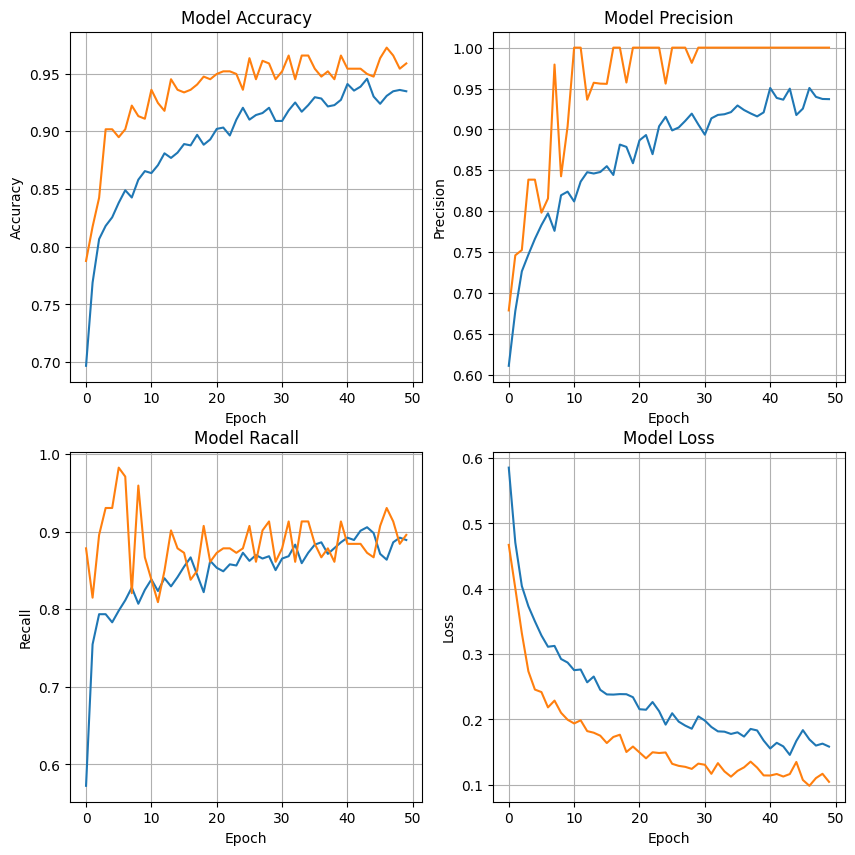

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()

plt.subplot(222)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title("Model Precision")
plt.grid()

plt.subplot(223)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title("Model Racall")
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.grid()

plt.subplot(224)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

In [6]:
model.save("model_bidir.h5")

____
Use Convolution

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [8]:
# Function to load images from the folder
def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            # Load image
            img_path = os.path.join(folder, filename)
            image = load_img(img_path, color_mode='grayscale', target_size=target_size)
            image = img_to_array(image)
            
            # Extract label from filename
            label = int(filename.split('_')[-1].split('.')[0])
            
            images.append(image)
            labels.append(label)
    
    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

folder_path = '/kaggle/input/depression-nitish/download_images'
X, y = load_images_from_folder(folder_path)

# Normalize the images
X = X / 255.0

# Ensure y is of correct type
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [13]:
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

input_shape = X_train.shape[1:]  # Shape of input features
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Display model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 128, 32)        │        12,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 64, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 64, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,729 (584.88 KB)

 Trainable params: 149,729 (584.88 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Set the number of epochs
    batch_size=32,  # Set the batch size
    validation_split=0.2  # Use a portion of training data for validation
)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - Precision: 0.5552 - Recall: 0.3115 - accuracy: 0.6508 - loss: 0.6232 - val_Precision: 1.0000 - val_Recall: 0.4921 - val_accuracy: 0.8171 - val_loss: 0.3926
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - Precision: 0.8695 - Recall: 0.7922 - accuracy: 0.8677 - loss: 0.3313 - val_Precision: 0.9008 - val_Recall: 0.9365 - val_accuracy: 0.9400 - val_loss: 0.2669
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - Precision: 0.9313 - Recall: 0.8330 - accuracy: 0.9087 - loss: 0.2594 - val_Precision: 1.0000 - val_Recall: 0.5952 - val_accuracy: 0.8543 - val_loss: 0.2840
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - Precision: 0.9676 - Recall: 0.8648 - accuracy: 0.9281 - loss: 0.2075 - val_Precision: 0.9683 - val_Recall: 0.9683 - val_accuracy: 0.9771 - val_loss: 0.0836
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - Precision: 0.9747 - Recall: 0.9676 - accuracy: 0.9772 - loss: 0.0838 - val_Precision: 1.0000 - val_Recall: 0.96

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0013    
Test Loss: 0.001145878341048956
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0


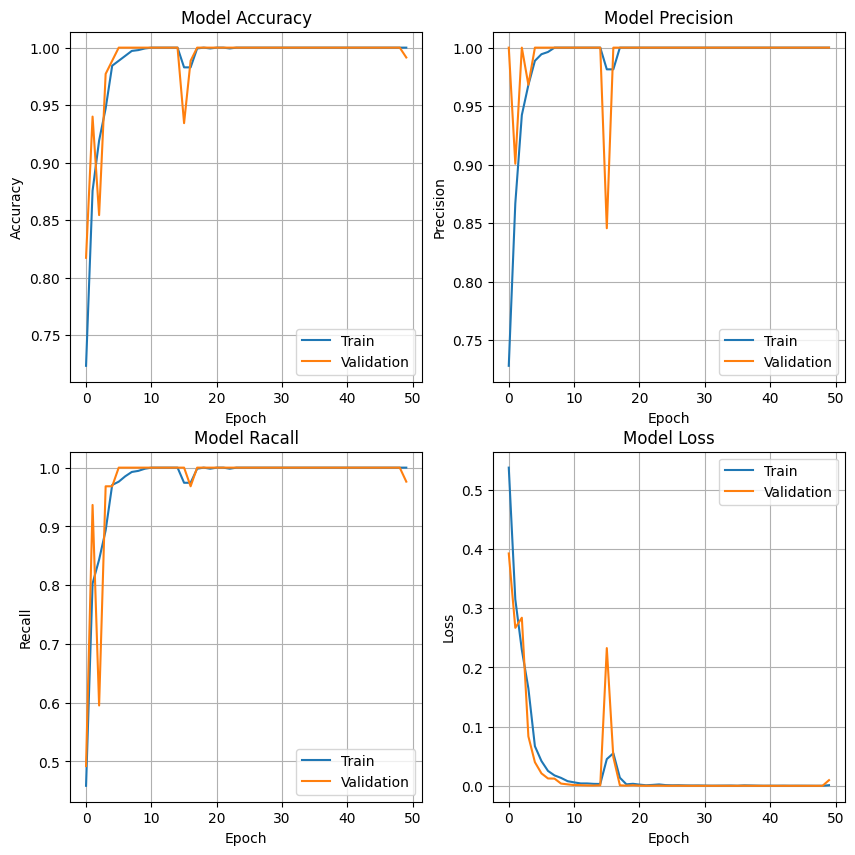

In [16]:
# import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Validation'])

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'])
# plt.show()


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.subplot(222)
plt.plot(history.history['Precision'])
plt.plot(history.history['val_Precision'])
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title("Model Precision")
plt.legend(['Train', 'Validation'])
plt.grid()

plt.subplot(223)
plt.plot(history.history['Recall'])
plt.plot(history.history['val_Recall'])
plt.title("Model Racall")
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.subplot(224)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid()

In [17]:
model.save("model_cnn.h5")